In [2]:
from IPython.display import Image, display

# CAP Theorem

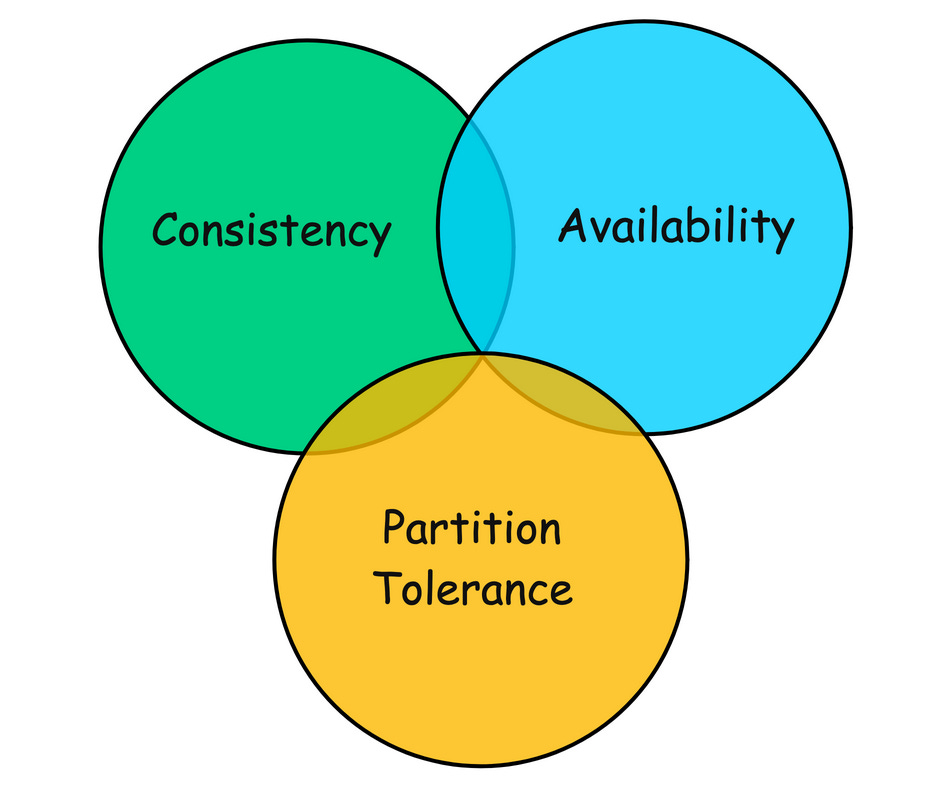

In [3]:
display(Image(filename='Utils/1.jpg'))

The CAP theorem, introduced by Eric Brewer in 2000, provides a fundamental framework for understanding the trade-offs that must be made when designing distributed systems.

**CAP stands for Consistency, Availability, and Partition Tolerance**, and the theorem states that:

**It is impossible for a distributed data store to simultaneously provide all three guarantees.**



1. **Consistency (C)** : Every read receives the most recent write or an error.

2. **Availability (A)** : Every request (read or write) receives a non-error response, without guarantee that it contains the most recent write.

3. **Partition Tolerance (P)** : The system continues to operate despite an arbitrary number of messages being dropped (or delayed) by the network between nodes.


# 3 Pillars of CAP

## 1. Consistency


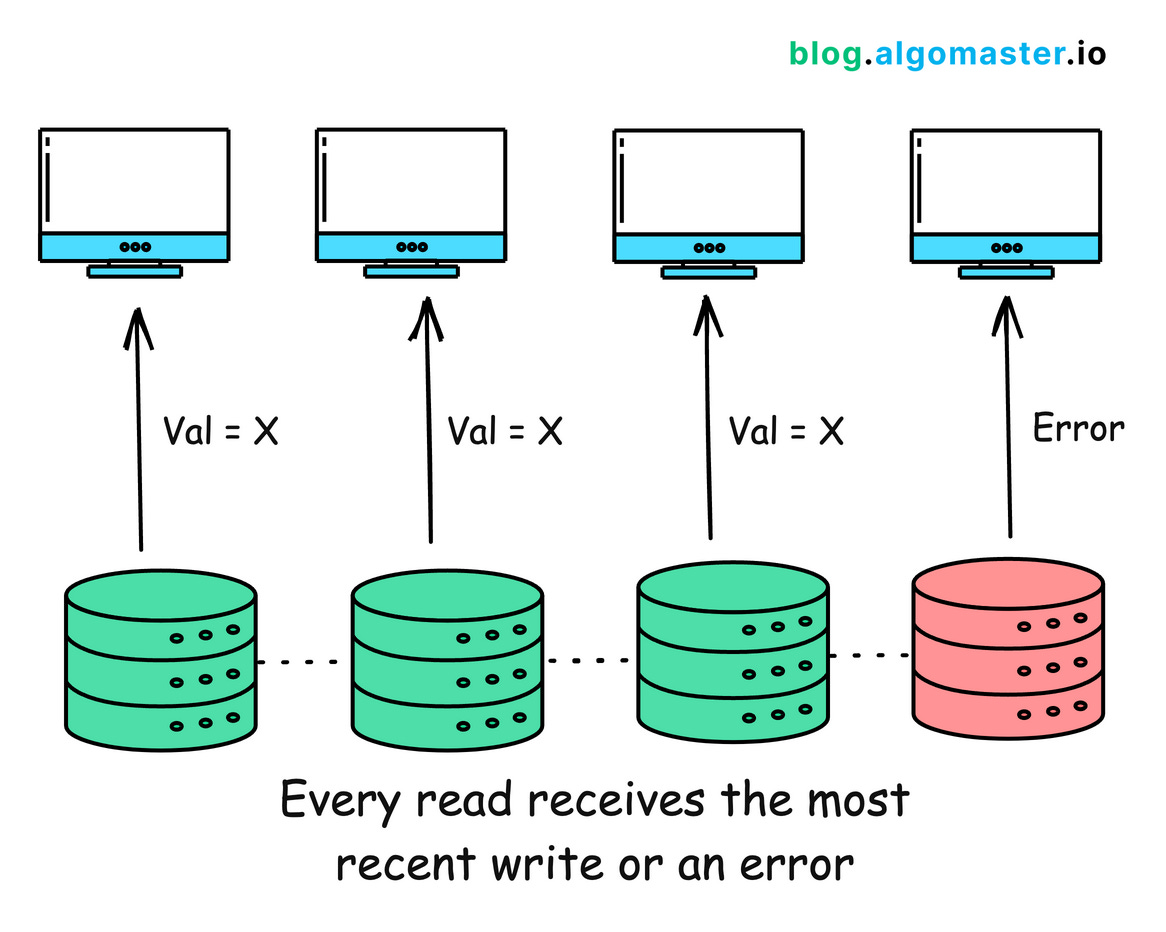

In [4]:
display(Image(filename='Utils/2.jpg'))


**Consistency ensures that every read receives the most recent write or an error.**

**This means that all working nodes in a distributed system will return the same data at any given time.**



1. In a consistent distributed system, if you write data to node A, a read operation from node B will immediately reflect the write operation on node A.

2. Consistency is crucial for applications where having the most up-to-date data is critical, such as **financial systems**, where a balance inquiry must reflect the most up-to-date state of an account.

## 2. Availability


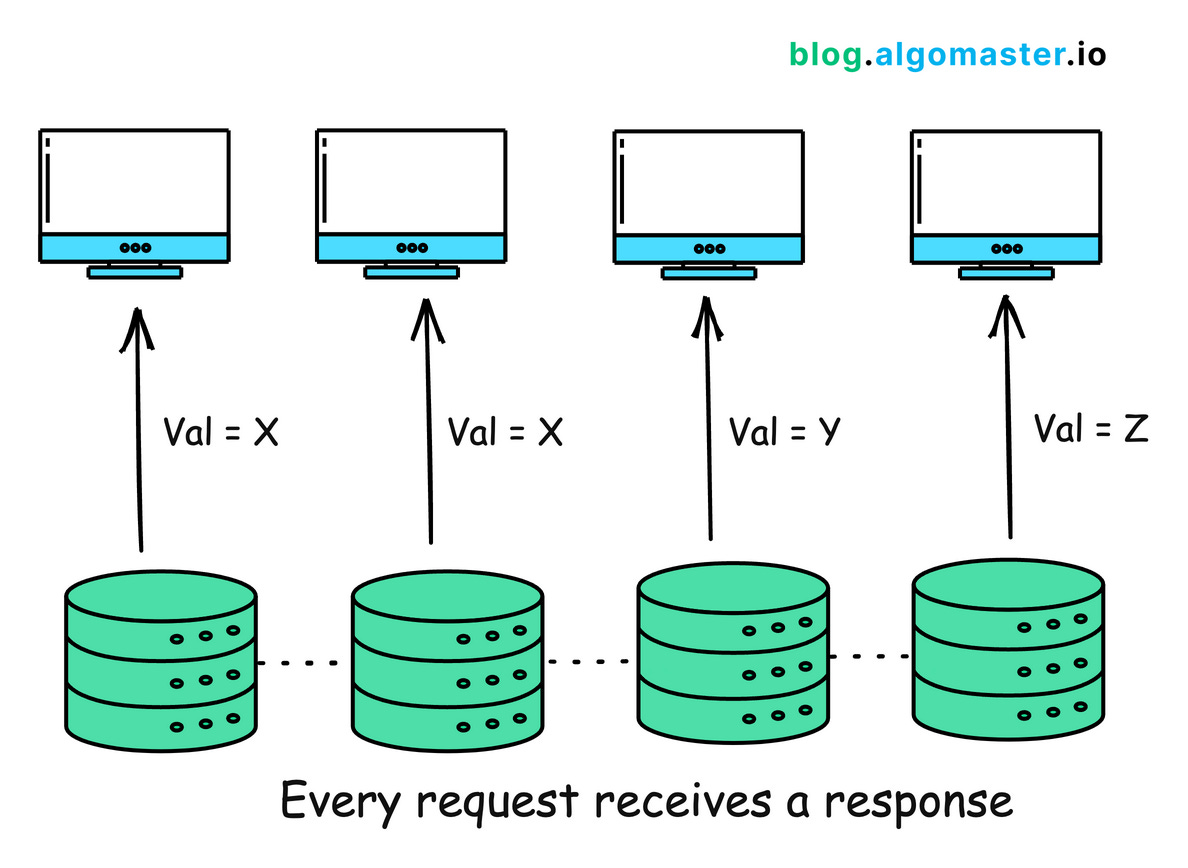

In [5]:
display(Image(filename='Utils/3.jpg'))

**Availability guarantees that every request (read or write) receives a response, without ensuring that it contains the most recent write.**

**This means that the system remains operational and responsive, even if the response from some of the nodes don’t reflect most up-to-date data.**

1. Availability is important for applications that need to remain operational at all times, such as **online retail systems**.

## 3. Partition Tolerance

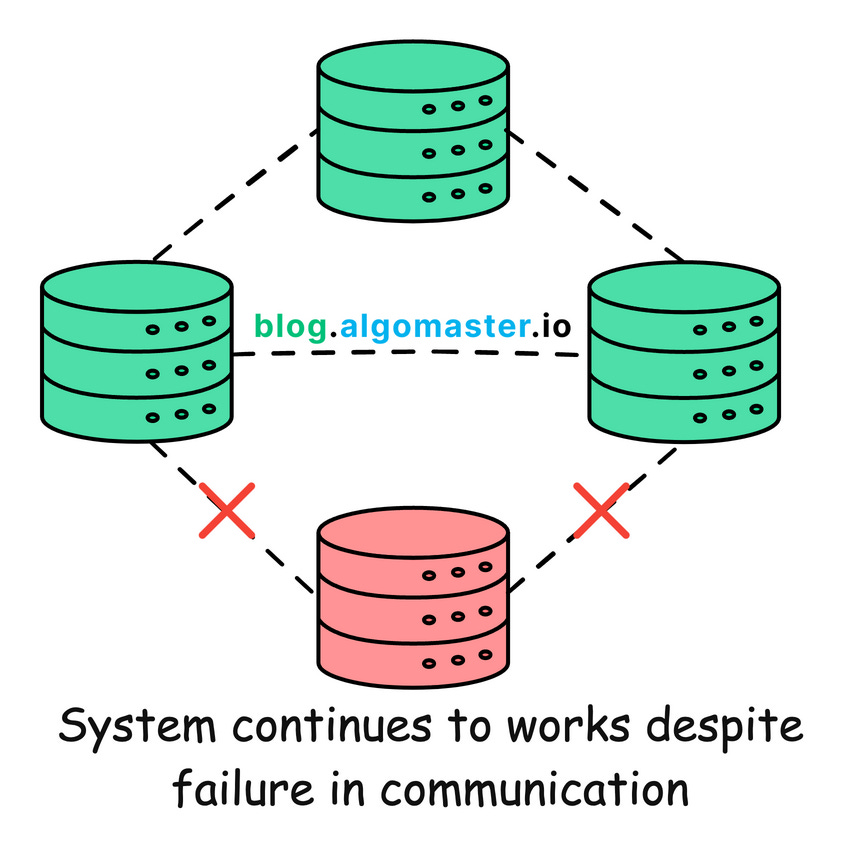

In [6]:
display(Image(filename='Utils/4.jpg'))


**Partition Tolerance means that the system continues to function despite network partitions where nodes cannot communicate with each other**

**Note :** A network partition occurs when a network failure causes a distributed system to split into two or more groups of nodes that cannot communicate with each other.

1. Partition Tolerance is essential for distributed systems because network failures can and do happen.

2. A system that tolerates partitions can maintain operations across different network segments.

# The CAP Trade-Off: Choosing 2 out of 3



## 1. CP (Consistency and Partition Tolerance):

1. These systems prioritize **consistency and can tolerate network partitions** , but at the cost of availability. **During a partition, the system may reject some requests** to maintain consistency.

2. Traditional relational databases, such as MySQL and PostgreSQL, when configured for strong consistency, **prioritize consistency over availability during network partitions**.

3. Banking systems typically prioritize consistency over availability since data accuracy is more critical than availability during network issues.

4. Consider an ATM network for a bank. When you withdraw money, the system must ensure that your balance is updated accurately across all nodes (consistency) to prevent overdrafts or other errors.

## 2. AP (Availability and Partition Tolerance):

1. These systems ensure availability and can tolerate network partitions, but at the cost of consistency. During a partition, different nodes may return different values for the same data.

2. NoSQL databases like Cassandra and DynamoDB are designed to be **highly available and partition-tolerant, potentially at the cost of strong consistency**.

3. Amazon's shopping cart system is designed to always accept items, prioritizing availability.

4. When you add items to your Amazon cart, the action almost never fails, even during high traffic periods like Black Friday. (Their first priority is adding into cart , not check in dB at traffic moment for stock , at checkout there might be a pop of out of stock)

## 3. CA (Consistency and Availability):

1. In the absence of partitions, a system can be both consistent and available. However, **network partitions are inevitable in distributed systems**, making this combination impractical.

2. Example Systems: Single-node databases can provide both consistency and availability but aren't partition-tolerant. In a distributed setting, this combination is theoretically impossible.

# Practical Design Strategies

**1. Eventual Consistency**

1. For many systems, strict consistency isn't always necessary.

2. Eventual consistency can provide a good balance where updates are propagated to all nodes **eventually, but not immediately**.

3. Example: Systems where **immediate consistency is not critical, such as DNS and content delivery networks (CDNs)**.

**2. Strong Consistency**

1. A model ensuring that once a write is confirmed, any subsequent reads will return that value.

2. Example: Systems requiring high data accuracy, like financial applications and inventory management.

**3. Tunable Consistency**

1. Tunable consistency **allows systems to adjust their consistency levels** based on specific needs, providing a balance between strong and eventual consistency.

2. Systems like **Cassandra allow configuring the level of consistency on a per-query basis**, providing flexibility.

3. Example: Applications needing different consistency levels for different operations, such as e-commerce platforms where **order processing requires strong consistency but product recommendations can tolerate eventual consistency**.

**4. Quorum-Based Approaches:**

1. Quorum-based approaches use **voting among a group of nodes** to ensure a certain level of consistency and fault tolerance.

2. Example: Systems needing a balance between consistency and availability, often used in consensus algorithms like Paxos and Raft. (read about them another time)

3. Consensus ensures:
   1. Only one version of truth exists.
   2. System remains correct even with failures.

## Beyond CAP: PACELC

1. While CAP is foundational, it doesn't cover all scenarios.

2. Daniel Abadi proposed the PACELC theorem as an extension by introducing **latency and consistency** as additional attributes of distributed systems.

    1. If there is a partition (P), the trade-off is between availability and consistency (A and C).
    
    2. Else (E), the trade-off is between latency (L) and consistency (C).

This theorem acknowledges that **even when the system is running normally, there's a tradeoff between latency and consistency.**

**In conclusion, the CAP Theorem is a powerful tool for understanding the inherent trade-offs in distributed system design. It's not about choosing the "best" property, but rather about making informed decisions based on the specific needs of your application.**